In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df.head()

,City
0,ribeira grande
1,churapcha
2,constitucion
3,tautira
4,tsihombe


In [4]:
cities_df['Cloudiness'] = np.nan
cities_df['Country'] = np.nan
cities_df['Date'] = np.nan
cities_df['Humidity'] = np.nan
cities_df['Lat'] = np.nan
cities_df['Lng'] = np.nan
cities_df['Max Temp'] = np.nan
cities_df['Wind Speed'] = np.nan

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,churapcha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,constitucion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tautira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tsihombe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform API Calls

In [5]:
# create a params dict that will be updated with new city each iteration
params = {"units": "imperial","appid": api_key}

# Loop through the cities_df and run a lat search for each city
for index, row in cities_df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    city = row['City']
    
    #update address key value
    params['q'] = city
    
    # make request
    cities_lat = requests.get(base_url, params=params).json()

    #extract results
    results = cities_lat
    
    try:
        print("Extracting Data")
        cities_df.loc[index, 'Cloudiness'] = results["clouds"]["all"]
        cities_df.loc[index, 'Country'] = results["sys"]["country"]
        cities_df.loc[index, 'Date'] = results["dt"]
        cities_df.loc[index, 'Humidity'] = results["main"]["humidity"]
        cities_df.loc[index, 'Lat'] = results["coord"]["lat"]
        cities_df.loc[index, 'Lng'] = results["coord"]["lon"]
        cities_df.loc[index, 'Max Temp'] = results["main"]["temp_max"]
        cities_df.loc[index, 'Wind Speed'] = results["wind"]["speed"]
    
    except (KeyError):
        print("Missing field/result..skipping.")


Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracti

Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Missing field/result..skipping.
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracting Data
Extracti

In [6]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,20.0,PT,1.535608e+09,97.0,38.52,-28.70,76.10,15.99
1,churapcha,88.0,RU,1.535608e+09,84.0,62.00,132.43,59.99,3.58
2,constitucion,36.0,MX,1.535608e+09,95.0,23.99,-104.67,55.22,3.02
3,tautira,40.0,PF,1.535607e+09,83.0,-17.73,-149.15,73.40,4.70
4,tsihombe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,prince rupert,75.0,CA,1.535605e+09,100.0,54.32,-130.32,53.60,2.24
6,bredasdorp,80.0,ZA,1.535605e+09,72.0,-34.53,20.04,60.80,8.05
7,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,atambua,8.0,ID,1.535608e+09,78.0,-9.11,124.89,83.93,8.39
9,saint-augustin,56.0,FR,1.535605e+09,93.0,44.83,-0.61,55.40,3.36


In [8]:
cities_df_clean = cities_df.dropna(axis=0, how='any', inplace=False)
cities_df_clean

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,20.0,PT,1.535608e+09,97.0,38.52,-28.70,76.10,15.99
1,churapcha,88.0,RU,1.535608e+09,84.0,62.00,132.43,59.99,3.58
2,constitucion,36.0,MX,1.535608e+09,95.0,23.99,-104.67,55.22,3.02
3,tautira,40.0,PF,1.535607e+09,83.0,-17.73,-149.15,73.40,4.70
5,prince rupert,75.0,CA,1.535605e+09,100.0,54.32,-130.32,53.60,2.24
6,bredasdorp,80.0,ZA,1.535605e+09,72.0,-34.53,20.04,60.80,8.05
8,atambua,8.0,ID,1.535608e+09,78.0,-9.11,124.89,83.93,8.39
9,saint-augustin,56.0,FR,1.535605e+09,93.0,44.83,-0.61,55.40,3.36
10,yellowknife,40.0,CA,1.535605e+09,87.0,62.45,-114.38,44.60,7.72
12,bosaso,0.0,SO,1.535608e+09,85.0,11.28,49.18,87.71,8.95


In [20]:
# save cities_df_clean as a csv
cities_df_clean.to_csv('resources/cities.csv')

# Latitude vs. Temperature Plot

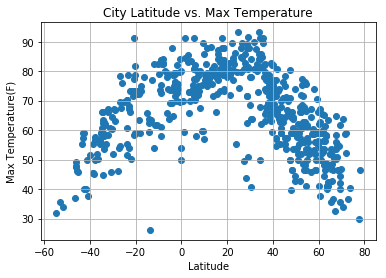

In [21]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_MaxTemp.png')
plt.show()

# Latitude vs. Humidity Plot

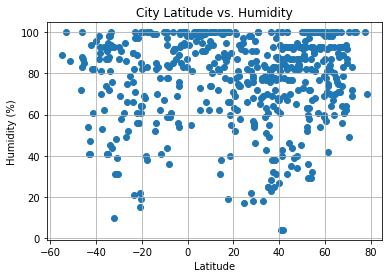

In [22]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_Humidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

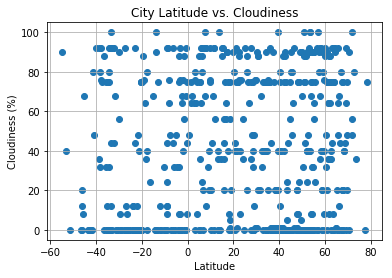

In [23]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_Cloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

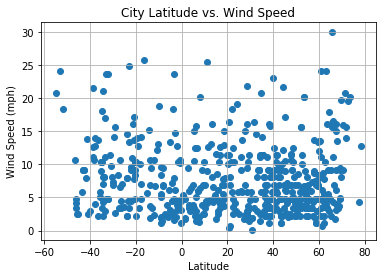

In [24]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.savefig('graphs/Lat_WindSpeed.png')
plt.show()

# Three Observations:

- Cities closer to Lat 0 have higher temperatures
- The rate of temperature decrease is higher for cities above the equator.
- Cities above the equator have a closer temperature range along with higher temperatures. 
- Humiditiy, Cloudiness, and Wind Speed do not seem to have a connection to Latitude